# I. Numpy

### Импортируйте NumPy

In [3]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [7]:
array1 = np.array([0, 0, 0 , 0, 1, 0, 0, 0, 0, 0])
array1 = array1.reshape([2, 5])
array1

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [8]:
array2 = np.arange(10, 50)
array2 = array2[::-1]
array2 = array2[1::2]
array2

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [9]:
array3 = np.arange(0, 9).reshape([3, 3])
array3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [10]:
array4 = np.random.rand(4, 3, 3)
min = array4.min()
max = array4.max()

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [11]:
array5_1 = np.arange(24).reshape([6, 4])
array5_2 = np.arange(12).reshape([4, 3])
array5_1.dot(array5_2)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262],
       [258, 312, 366],
       [330, 400, 470],
       [402, 488, 574]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [12]:
array6 = np.random.rand(7, 7)
mean = array6.mean()
std = array6.std()
normalized = (array6 - mean) / std

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [14]:
tips_ds = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [15]:
tips_ds.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [16]:
tips_ds.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [17]:
tips_ds.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


### Посмотрите на распределение числовых признаков

In [18]:
tips_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Найдите максимальное значение 'total_bill'

In [19]:
tips_ds['total_bill'].max()

50.81

### Найдите количество курящих людей

In [20]:
tips_ds[tips_ds['smoker'] == 'Yes'].count()

total_bill    93
tip           93
sex           93
smoker        93
day           93
time          93
size          93
dtype: int64

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [21]:
tips_ds.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [22]:
median = tips_ds['total_bill'].median()
gt_median = tips_ds[tips_ds['total_bill'] > median]
gt_median.groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [23]:
tips_ds['smoker'] = tips_ds['smoker'].apply(lambda x: 0 if x == 'No' else 1)
tips_ds

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<Axes: >

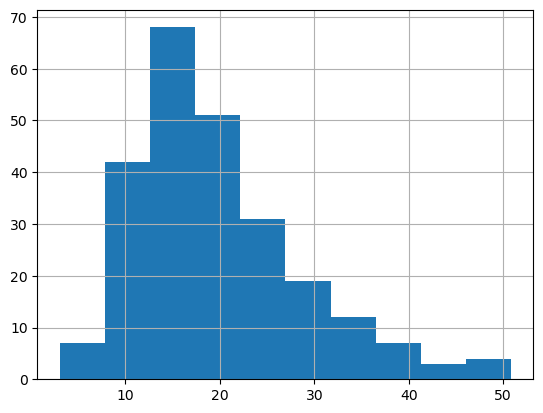

In [24]:
tips_ds['total_bill'].hist()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

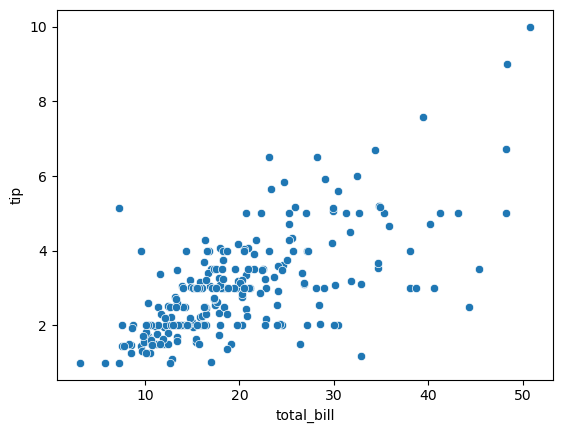

In [27]:
sns.scatterplot(data=tips_ds, x='total_bill', y='tip')

### Постройте pairplot

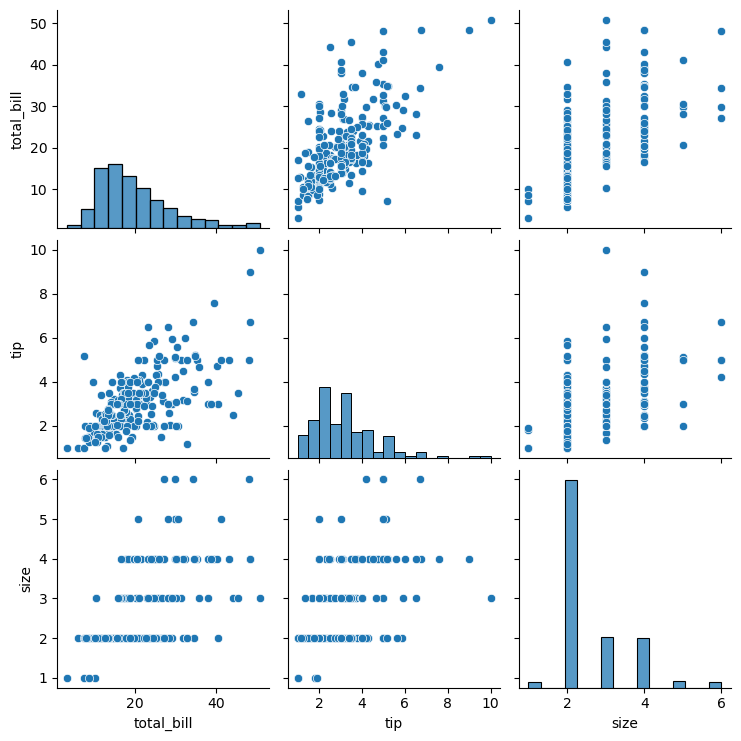

In [28]:
sns.pairplot(tips_ds)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

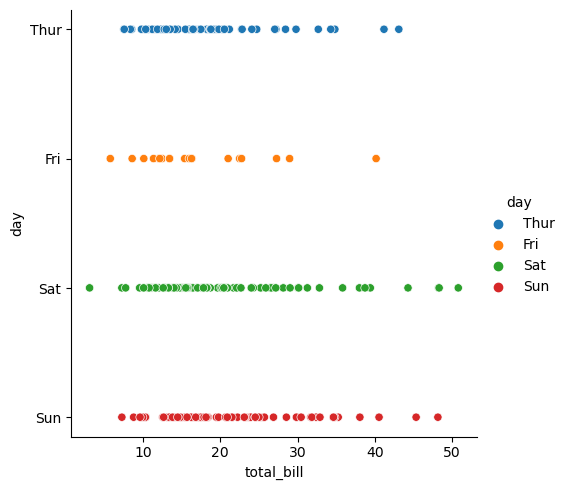

In [34]:
sns.relplot(data=tips_ds, x='total_bill', y='day', hue='day')

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<Axes: xlabel='tip', ylabel='Count'>

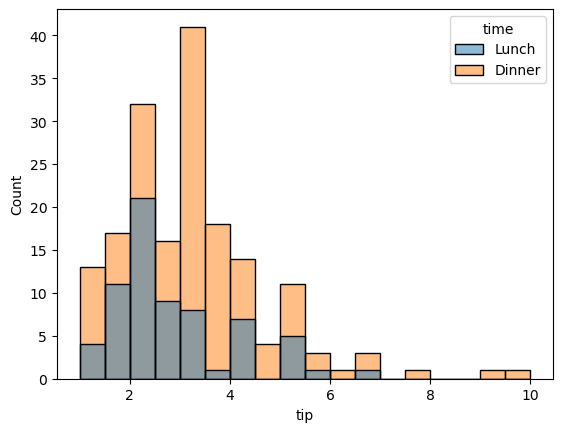

In [32]:
data = tips_ds[['tip', 'time']]
sns.histplot(data, x='tip', hue='time')

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

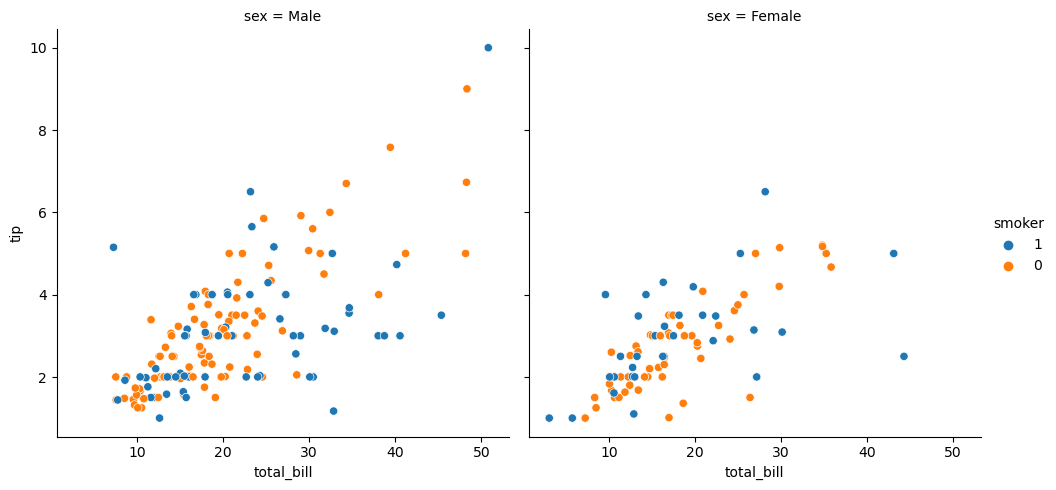

In [33]:
sns.relplot(data=tips_ds, x='total_bill', y='tip', col='sex', hue='smoker')

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.